In [69]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [70]:
import datetime as dt
mydateparser = lambda x: dt.datetime.strptime(x, "%H:%M")
df=pd.read_csv("data/all_locations2.csv", parse_dates=["time"], date_parser= mydateparser, index_col=1)
df.drop(df.columns[[0]], axis=1, inplace=True)
df

,minute,customer_id,location
time,,,
1900-01-01 08:01:00,1,1,drinks
1900-01-01 08:01:00,1,2,dairy
1900-01-01 08:01:00,1,3,fruit
1900-01-01 08:02:00,2,1,spices
1900-01-01 08:02:00,2,2,checkout
...,...,...,...
1900-01-01 21:59:00,839,1293,checkout
1900-01-01 21:59:00,839,1294,checkout
1900-01-01 21:59:00,839,1295,dairy


In [71]:
df["hour"]=df.index.hour
df

,minute,customer_id,location,hour
time,,,,
1900-01-01 08:01:00,1,1,drinks,8
1900-01-01 08:01:00,1,2,dairy,8
1900-01-01 08:01:00,1,3,fruit,8
1900-01-01 08:02:00,2,1,spices,8
1900-01-01 08:02:00,2,2,checkout,8
...,...,...,...,...
1900-01-01 21:59:00,839,1293,checkout,21
1900-01-01 21:59:00,839,1294,checkout,21
1900-01-01 21:59:00,839,1295,dairy,21


### By Hours

Text(0, 0.5, 'Nr of Customers')

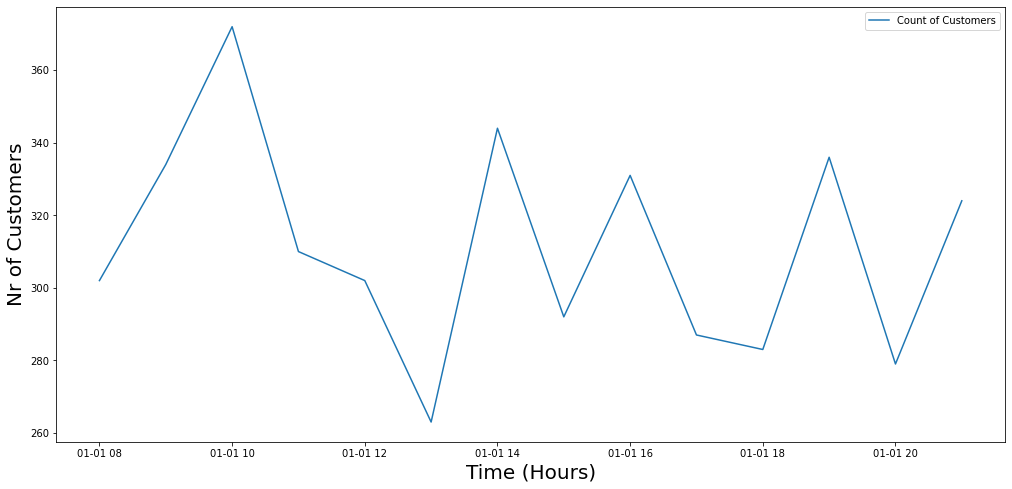

In [80]:

plt.figure(figsize = (17,8))
plt.gcf().set_facecolor('white')
p=sns.lineplot(x = df.resample('H').count().index, y = 'customer_id', data = df.resample('H').count(), label="Count of Customers")
plt.legend(loc='upper right')
p.set_xlabel("Time (Hours)", fontsize = 20)
p.set_ylabel("Nr of Customers", fontsize = 20)

### Customer Distribution by Location

Text(0, 0.5, 'location')

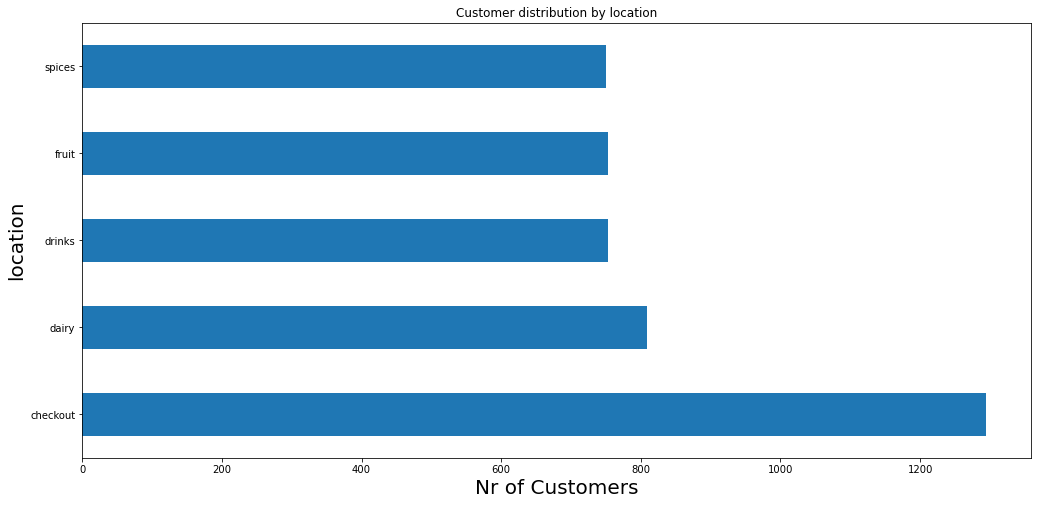

In [78]:
plt.figure(figsize = (17,8))
plt.gcf().set_facecolor('white')
df.groupby(["location"])['customer_id'].count().plot.barh()
plt.title("Customer distribution by location")
plt.xlabel("Nr of Customers", fontsize = 20)
plt.ylabel("location", fontsize = 20)

### Nr of customers in each section over time

Text(0, 0.5, 'Nr of Customers')

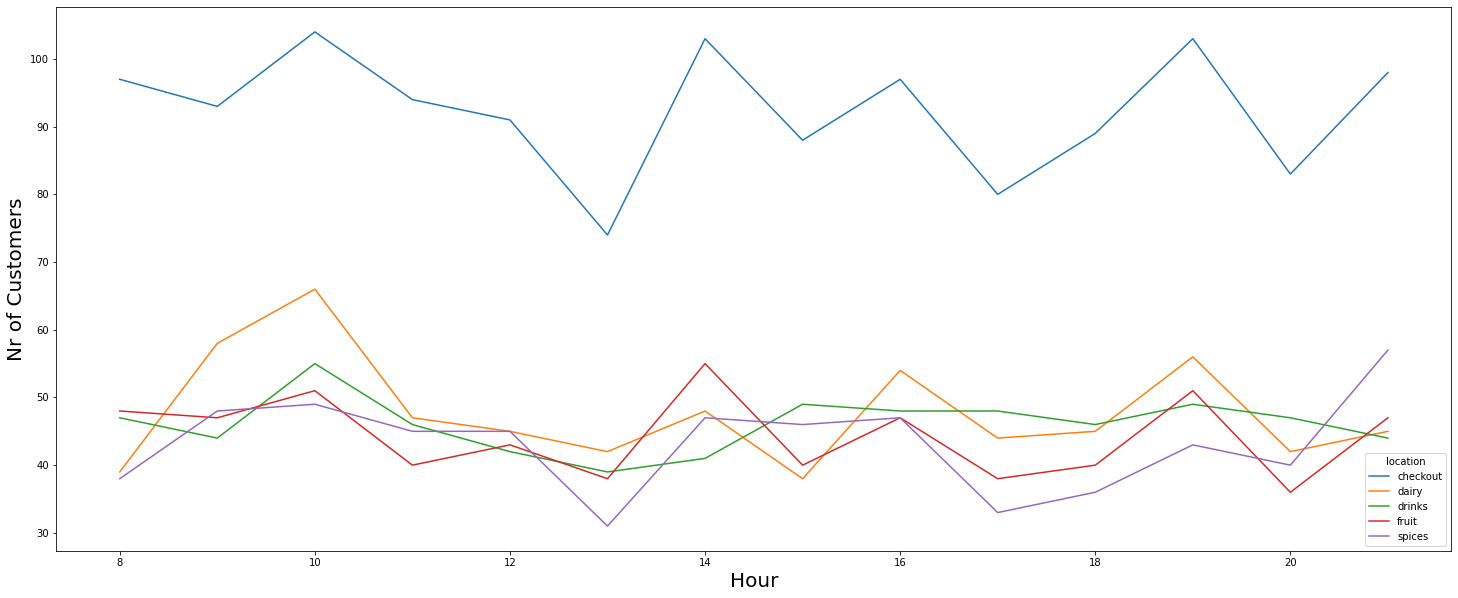

In [76]:

plt.figure(figsize = (25,10))
plt.gcf().set_facecolor('white')
total_customers_time = pd.DataFrame(df.groupby(["location","hour"])["customer_id"].nunique())
total_customers_time.reset_index(inplace=True)
p=sns.lineplot(x="hour", y="customer_id", hue="location", data=total_customers_time)
plt.xlabel("Hour", fontsize = 20)
plt.ylabel("Nr of Customers", fontsize = 20)

In [81]:
last_values = df.groupby('customer_id')["location"].last()
last_values=last_values.reset_index()
df_customerid_no=last_values[last_values["location"]!="checkout"]
list_of_customerid_not=df_customerid_no["customer_id"].tolist()
df=df[~df['customer_id'].isin(list_of_customerid_not)]
df

,minute,customer_id,location,hour
time,,,,
1900-01-01 08:01:00,1,1,drinks,8
1900-01-01 08:01:00,1,2,dairy,8
1900-01-01 08:01:00,1,3,fruit,8
1900-01-01 08:02:00,2,1,spices,8
1900-01-01 08:02:00,2,2,checkout,8
...,...,...,...,...
1900-01-01 21:58:00,838,1291,checkout,21
1900-01-01 21:58:00,838,1293,spices,21
1900-01-01 21:58:00,838,1294,spices,21


In [82]:
df_sorted = df.sort_values(["customer_id", "time"])
df_sorted.head()

,minute,customer_id,location,hour
time,,,,
1900-01-01 08:01:00,1,1,drinks,8
1900-01-01 08:02:00,2,1,spices,8
1900-01-01 08:03:00,3,1,fruit,8
1900-01-01 08:04:00,4,1,checkout,8
1900-01-01 08:01:00,1,2,dairy,8


### TRANSITION MATRIX of SIMULATION

In [83]:
df_sorted["next_location"] = df_sorted["location"].shift(-1)
trans_matrix = pd.crosstab(
    df_sorted["location"], df_sorted["next_location"], normalize=0
)
trans_matrix.loc["checkout"][0]=1
trans_matrix.loc["checkout"][1:5]=0
trans_matrix

next_location,checkout,dairy,drinks,fruit,spices
location,,,,,
checkout,1.000000,0.000000,0.000000,0.000000,0.000000
dairy,0.398022,0.000000,0.229913,0.191595,0.180470
drinks,0.503320,0.031873,0.000000,0.221780,0.243028
fruit,0.509960,0.217795,0.136786,0.000000,0.135458
spices,0.278667,0.329333,0.217333,0.174667,0.000000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 586 entries, 1900-01-01 07:00:00 to 1900-01-01 08:59:00
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   minute       586 non-null    int64 
 1   customer_id  586 non-null    int64 
 2   location     586 non-null    object
dtypes: int64(2), object(1)
memory usage: 18.3+ KB


In [25]:
df_numeric=df.copy()

In [26]:
df_numeric.loc[df_numeric["location"]=="checkout", "location"]=0
df_numeric.loc[df_numeric["location"]=="dairy", "location"]=1
df_numeric.loc[df_numeric["location"]=="drinks", "location"]=2
df_numeric.loc[df_numeric["location"]=="fruit", "location"]=3
df_numeric.loc[df_numeric["location"]=="spices", "location"]=4


In [27]:
df_numeric.head()

,minute,customer_id,location
time,,,
1900-01-01 07:00:00,0,1,1
1900-01-01 07:00:00,0,2,3
1900-01-01 07:00:00,0,3,1
1900-01-01 07:01:00,1,1,3
1900-01-01 07:01:00,1,2,2


In [28]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 586 entries, 1900-01-01 07:00:00 to 1900-01-01 08:59:00
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   minute       586 non-null    int64 
 1   customer_id  586 non-null    int64 
 2   location     586 non-null    object
dtypes: int64(2), object(1)
memory usage: 18.3+ KB


In [29]:
import numpy as np
df_numeric["location"]=df_numeric["location"].astype(np.int64)


In [30]:
df_numeric.to_csv("data/moves.csv")

In [31]:
df_read=pd.read_csv("data/moves.csv")

In [32]:
df_read

,time,minute,customer_id,location
0,1900-01-01 07:00:00,0,1,1
1,1900-01-01 07:00:00,0,2,3
2,1900-01-01 07:00:00,0,3,1
3,1900-01-01 07:01:00,1,1,3
4,1900-01-01 07:01:00,1,2,2
...,...,...,...,...
581,1900-01-01 08:59:00,119,171,0
582,1900-01-01 08:59:00,119,173,0
583,1900-01-01 08:59:00,119,174,0
584,1900-01-01 08:59:00,119,176,0


In [33]:
df_read.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   time         586 non-null    object
 1   minute       586 non-null    int64 
 2   customer_id  586 non-null    int64 
 3   location     586 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 18.4+ KB


In [34]:
array=df_read[["minute","customer_id","location"]].to_numpy()
array

array([[  0,   1,   1],
       [  0,   2,   3],
       [  0,   3,   1],
       ...,
       [119, 174,   0],
       [119, 176,   0],
       [119, 178,   0]], dtype=int64)

In [35]:
numpy_array = df_numeric.to_numpy()
numpy_array


array([[  0,   1,   1],
       [  0,   2,   3],
       [  0,   3,   1],
       ...,
       [119, 174,   0],
       [119, 176,   0],
       [119, 178,   0]], dtype=int64)

- Unique number of customers 

In [36]:
df["customer_id"].nunique()

176

- How many checkouts

In [37]:
df[df["location"]=="checkout"]

,minute,customer_id,location
time,,,
1900-01-01 07:01:00,1,3,checkout
1900-01-01 07:02:00,2,1,checkout
1900-01-01 07:02:00,2,2,checkout
1900-01-01 07:03:00,3,4,checkout
1900-01-01 07:04:00,4,5,checkout
...,...,...,...
1900-01-01 08:59:00,119,171,checkout
1900-01-01 08:59:00,119,173,checkout
1900-01-01 08:59:00,119,174,checkout


- Check a customer

In [38]:
df[df["customer_id"]==45]

,minute,customer_id,location
time,,,
1900-01-01 07:27:00,27,45,fruit
1900-01-01 07:28:00,28,45,spices
1900-01-01 07:29:00,29,45,dairy
1900-01-01 07:30:00,30,45,spices
1900-01-01 07:31:00,31,45,dairy
1900-01-01 07:32:00,32,45,checkout


In [39]:
list1=df["customer_id"].unique()
list1

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 176, 178], dtype=int64)

In [40]:
df2=df[df['location'] == 'checkout'].groupby(['customer_id']).count()
df2

,minute,location
customer_id,,
1,1,1
2,1,1
3,1,1
4,1,1
5,1,1
...,...,...
172,1,1
173,1,1
174,1,1


In [41]:
df2[df2["location"]>1]

,minute,location
customer_id,,


In [42]:
list2=df2.index.values
list2

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 176, 178], dtype=int64)

In [43]:
set(list1)-set(list2)

set()

In [44]:
df[df["customer_id"]==166]

,minute,customer_id,location
time,,,
1900-01-01 08:53:00,113,166,fruit
1900-01-01 08:54:00,114,166,spices
1900-01-01 08:55:00,115,166,dairy
1900-01-01 08:56:00,116,166,spices
1900-01-01 08:57:00,117,166,dairy
1900-01-01 08:58:00,118,166,checkout
